Loading necessary Libraries

In [2]:
import os 
import torch
import torchvision
from torch import nn 


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Train,Test path

In [4]:
train_path = "D:\\Workspace\\Retinal OCT\\OCT2017\\train"
test_path = "D:\\Workspace\\Retinal OCT\\OCT2017\\test"
test_path, train_path

('D:\\Workspace\\Retinal OCT\\OCT2017\\test',
 'D:\\Workspace\\Retinal OCT\\OCT2017\\train')

Printing classnames

In [5]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['CNV', 'DME', 'DRUSEN', 'NORMAL']
['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [6]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

Creating data transforms

In [7]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [8]:
data_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

Turning images into pytorch tensors

In [9]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path,
                                    transform= data_transform,
                                    target_transform=None)

test_data = datasets.ImageFolder(root=test_path,
                                    transform=data_transform,
                                    target_transform=None)

print(f"Train data: \n{train_data}\n Test data: \n {test_data}")

Train data: 
Dataset ImageFolder
    Number of datapoints: 83484
    Root location: D:\Workspace\Retinal OCT\OCT2017\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data: 
 Dataset ImageFolder
    Number of datapoints: 968
    Root location: D:\Workspace\Retinal OCT\OCT2017\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [10]:
class_names = train_data.classes
class_names

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [11]:
class_dict = train_data.class_to_idx
class_dict

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [12]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9882, 0.9882],
         [1.0000, 1.0000, 1.0000,  ..., 0.4588, 0.4157, 0.4275],
         [1.0000, 1.0000, 1.0000,  ..., 0.1255, 0.0980, 0.0980],
         ...,
         [0.0196, 0.0196, 0.0118,  ..., 0.0196, 0.0235, 0.0157],
         [0.0235, 0.0235, 0.0314,  ..., 0.0118, 0.0235, 0.0235],
         [0.0196, 0.0078, 0.0235,  ..., 0.0235, 0.0235, 0.0118]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9882, 0.9882],
         [1.0000, 1.0000, 1.0000,  ..., 0.4588, 0.4157, 0.4275],
         [1.0000, 1.0000, 1.0000,  ..., 0.1255, 0.0980, 0.0980],
         ...,
         [0.0196, 0.0196, 0.0118,  ..., 0.0196, 0.0235, 0.0157],
         [0.0235, 0.0235, 0.0314,  ..., 0.0118, 0.0235, 0.0235],
         [0.0196, 0.0078, 0.0235,  ..., 0.0235, 0.0235, 0.0118]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9882, 0.9882],
         [1.0000, 1.0000, 1.0000,  ..., 0.4588, 0.4157, 0.4275],
         [1.0000, 1.0000, 1.0000,  ..., 0.12

In [13]:
image_permute = img.permute(1,2,0)
print(f"Original shape: {img.shape}")
print(f"Permuted shape: {image_permute.shape}")


Original shape: torch.Size([3, 224, 224])
Permuted shape: torch.Size([224, 224, 3])


Text(0.5, 1.0, 'CNV')

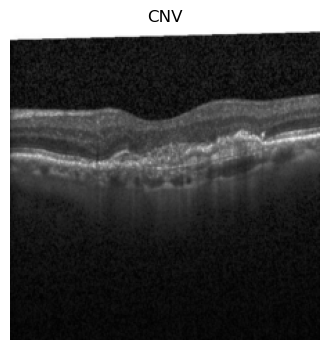

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,5))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label])

Turning dataset into dataloaders


In [15]:
batch_size = 8
num_workers = os.cpu_count()

from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=8,
                                num_workers=num_workers,
                                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=8,
                                num_workers=num_workers,
                                shuffle=False)

In [16]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x24324d6c3d0>,
 <torch.utils.data.dataloader.DataLoader at 0x2431b157910>)

In [17]:
img, label = next(iter(train_dataloader))


print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([8, 3, 224, 224])
Label shape: torch.Size([8])


In [18]:
img, label = next(iter(test_dataloader))


print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([8, 3, 224, 224])
Label shape: torch.Size([8])


In [19]:
train_data.classes , train_data.class_to_idx

(['CNV', 'DME', 'DRUSEN', 'NORMAL'],
 {'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3})

Data augmentation

In [20]:
from torchvision.transforms import Compose, Resize, RandomHorizontalFlip, ToTensor, Normalize
from PIL import Image

train_data_augmented = transforms.Compose([
    transforms.Resize((224,224), interpolation=Image.BILINEAR),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_data_augmented = transforms.Compose([
    transforms.Resize((224,224), interpolation=Image.BILINEAR),
    transforms.ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [21]:
train_data_augmented, test_data_augmented

(Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ))

In [22]:
from torchvision.datasets import ImageFolder
train_data_augmented = ImageFolder(root='D:/Workspace/Retinal OCT/OCT2017/train', transform=train_data_augmented)
test_data_augmented = ImageFolder(root='D:/Workspace/Retinal OCT/OCT2017/test', transform=test_data_augmented)

In [23]:
import os 
batch_size = 8
num_workers = os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        num_workers=num_workers)

test_dataloader_augmented = DataLoader(test_data_augmented,
                                    batch_size=batch_size,
                                    shuffle=False,
                                    num_workers=num_workers)

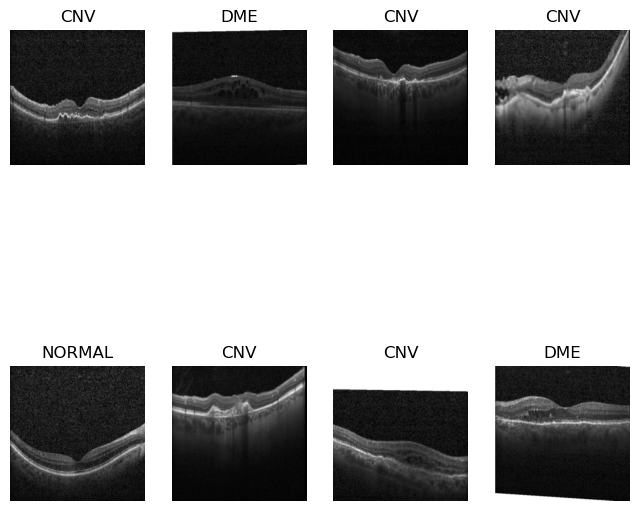

In [24]:
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=4)
    for i in range(8):
        ax = axes[i // 4, i % 4]
        img = images[i].permute(1, 2, 0)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[labels[i]])
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_dataloader))

# Show images
show_images(images, labels, class_names)


In [25]:
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(3))

Optic Model architecture

In [26]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [27]:
weights = torchvision.models.ResNet50_Weights.DEFAULT
model = torchvision.models.resnet50(weights=weights).to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [28]:
from torchinfo import summary

summary(model=model, 
        input_size=(8, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [8, 3, 224, 224]     [8, 1000]            --                   True
├─Conv2d (conv1)                         [8, 3, 224, 224]     [8, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [8, 64, 112, 112]    [8, 64, 112, 112]    128                  True
├─ReLU (relu)                            [8, 64, 112, 112]    [8, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [8, 64, 112, 112]    [8, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    └─Bottleneck (0)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [8, 64, 56, 56]      [8, 64, 56, 56]      4,096                True
│    │    └─BatchN

In [29]:
#Freeze all layers
for param in model.parameters():
    param.requires_grad = False

In [30]:
# Unfreeze last layer
for param in model.fc.parameters():
    param.requires_grad = True

In [31]:
summary(model=model, 
        input_size=(8, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [8, 3, 224, 224]     [8, 1000]            --                   Partial
├─Conv2d (conv1)                         [8, 3, 224, 224]     [8, 64, 112, 112]    (9,408)              False
├─BatchNorm2d (bn1)                      [8, 64, 112, 112]    [8, 64, 112, 112]    (128)                False
├─ReLU (relu)                            [8, 64, 112, 112]    [8, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [8, 64, 112, 112]    [8, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   False
│    └─Bottleneck (0)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [8, 64, 56, 56]      [8, 64, 56, 56]      (4,096)              False
│    │    

In [32]:
import torch
import torch.nn as nn
import torchvision.models as models

def resnet_output(num_classes):
    model = models.resnet50(pretrained=True)

    input_size = model.fc.in_features

    # Defining the new output layer
    new_fc = nn.Linear(input_size, num_classes)

    # Replacing the existing output layer with the new one
    model.fc = new_fc

    return model

# Example usage:
num_classes = 4  # Example number of classes
model = resnet_output(num_classes)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
summary(model, 
        input_size=(8, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [8, 3, 224, 224]     [8, 4]               --                   True
├─Conv2d (conv1)                         [8, 3, 224, 224]     [8, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [8, 64, 112, 112]    [8, 64, 112, 112]    128                  True
├─ReLU (relu)                            [8, 64, 112, 112]    [8, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [8, 64, 112, 112]    [8, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    └─Bottleneck (0)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [8, 64, 56, 56]      [8, 64, 56, 56]      4,096                True
│    │    └─BatchN

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.99))

Training the model

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import engine
from timeit import default_timer as timer 

start_time = timer()
results = engine.train(model=model,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=5,
                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5776 | train_acc: 0.7938 | test_loss: 0.1463 | test_acc: 0.9421
Epoch: 2 | train_loss: 0.3367 | train_acc: 0.8854 | test_loss: 0.0677 | test_acc: 0.9845
Epoch: 3 | train_loss: 0.2847 | train_acc: 0.9036 | test_loss: 0.0368 | test_acc: 0.9917
Epoch: 4 | train_loss: 0.2601 | train_acc: 0.9120 | test_loss: 0.0348 | test_acc: 0.9917
Epoch: 5 | train_loss: 0.2383 | train_acc: 0.9184 | test_loss: 0.0176 | test_acc: 0.9969


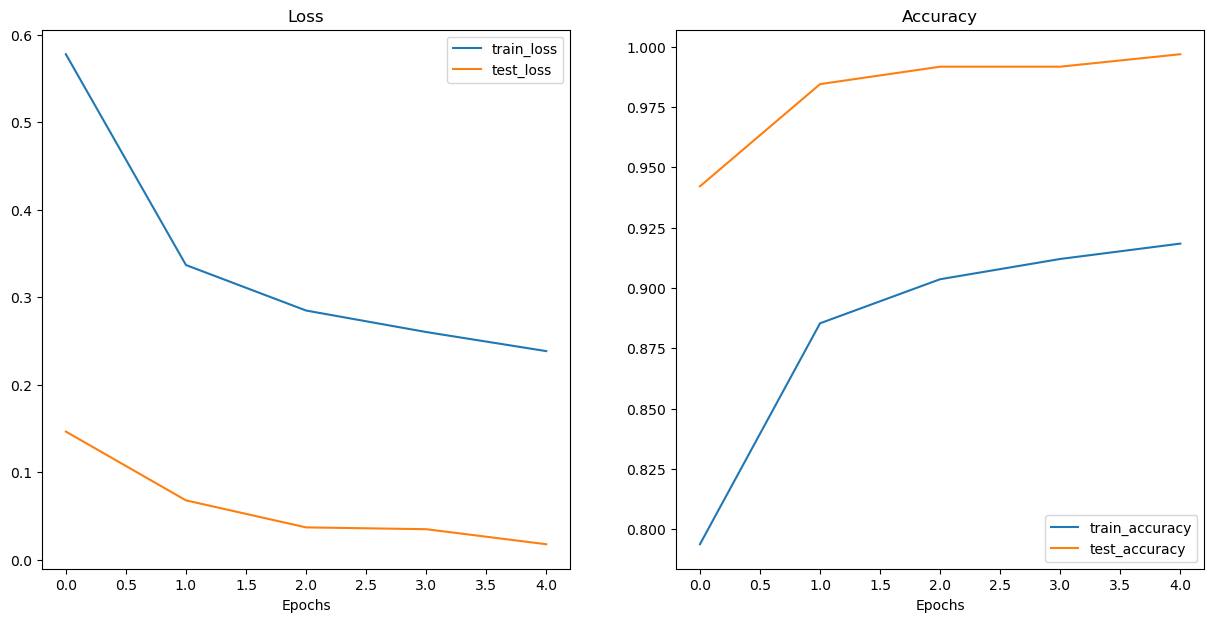

In [36]:
from helper_function import plot_loss_curves 
plot_loss_curves(results)

Saving the model

In [39]:
from utils import save_model
save_model(model=model,
            target_dir="models",
            model_name="model.pth")


[INFO] Saving model to: models\model.pth


Predicting a sample 

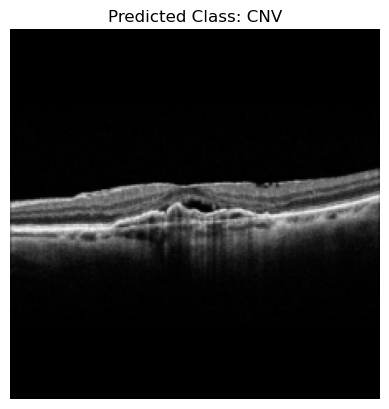

In [90]:
import torch
import requests
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Function to load image from a URL
def load_image(img_url):
    response = requests.get(img_url, stream=True)
    img = Image.open(response.raw)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)
    return img_tensor

# Function to predict the class of an image
def predict(model, img_tensor):
    model.eval()
    with torch.no_grad():
        img_tensor = img_tensor.to(device)
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your trained model with the modified architecture
num_classes = 4  
model = resnet_output(num_classes) 
model_path = "models/model.pth"
model_state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(model_state_dict)
model = model.to(device)


class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
img_url = "https://www.retinadoctor.com.au/wp-content/uploads/2016/05/CNV_OCT_SRF-1024x1024.jpg"

# Load image and predict class
img_tensor = load_image(img_url)
predicted_class = predict(model, img_tensor)

# Convert the PyTorch tensor to a NumPy array and transpose the dimensions
img_np = img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Denormalize the image
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_np = std * img_np + mean
img_np = np.clip(img_np, 0, 1)

# Display the image with the predicted class name as the title
plt.imshow(img_np)
plt.axis('off')
plt.title(f'Predicted Class: {class_names[predicted_class]}')
plt.show()
